# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

623


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setup the Endpoint url and units
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'

# Create a dataframe to store results of the calls
column_names = {
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date",
}
cities_df = pd.DataFrame(columns=column_names)

# Loop through each city and call the weather api
params = {
    "appid": weather_api_key,    
    "q": "",
    "units": units,
}

i = 1
skipped = 0

print("-------------------------------")    
print("    Begin processing Cities")
print("-------------------------------")

for city in cities:
    
    # Set up params for the specific city
    params["q"] = city
    
    # Grab the weather for this city from the endpoint
    weather_response = requests.get(url, params).json()
        
    # Check to make sure we got data for each of the cities
    try:
        new_row = {
            "City": city,
            "Lat": weather_response["coord"]["lat"],
            "Lng": weather_response["coord"]["lon"],
            "Max Temp": weather_response["main"]["temp_max"],
            "Humidity": weather_response["main"]["humidity"], 
            "Cloudiness": weather_response["clouds"]["all"],       
            "Wind Speed": weather_response["wind"]["speed"], 
            "Country":weather_response["sys"]["country"], 
            "Date": weather_response["dt"],
        }
        
        # Print and append the row to the dataframe
        print(f"Processing Record {i} of {len(cities)} | {city}")

        cities_df = cities_df.append(new_row, ignore_index=True)

        
    except (KeyError, IndexError):
        # Skip if anything is missing
        print(f"Skipping {city} as field or result was not present ({i})")
        skipped += 1
        
    i += 1

# Print out final proessing stats    
print("--------------------------------------------------------")    
print(f"   Processed {len(cities)} Cities")
print(f"   Skipped {skipped} Cities for lack of information")
print(f"   Leaving {len(cities_df)} to be used")
print("--------------------------------------------------------")    
                

-------------------------------
    Begin processing Cities
-------------------------------
Processing Record 1 of 623 | qinzhou
Processing Record 2 of 623 | college
Skipping maloshuyka as field or result was not present (3)
Processing Record 4 of 623 | jamestown
Processing Record 5 of 623 | provideniya
Processing Record 6 of 623 | sume
Processing Record 7 of 623 | rikitea
Processing Record 8 of 623 | komsomolskiy
Processing Record 9 of 623 | puerto carreno
Processing Record 10 of 623 | albany
Skipping gorno-chuyskiy as field or result was not present (11)
Skipping saleaula as field or result was not present (12)
Skipping grand river south east as field or result was not present (13)
Processing Record 14 of 623 | garowe
Processing Record 15 of 623 | yellowknife
Processing Record 16 of 623 | seoul
Processing Record 17 of 623 | busselton
Processing Record 18 of 623 | barrow
Skipping taolanaro as field or result was not present (19)
Processing Record 20 of 623 | kapaa
Processing Record 21

Skipping cagayan de tawi-tawi as field or result was not present (194)
Processing Record 195 of 623 | ust-nera
Processing Record 196 of 623 | cidreira
Skipping attawapiskat as field or result was not present (197)
Processing Record 198 of 623 | xuddur
Processing Record 199 of 623 | chuy
Processing Record 200 of 623 | padang
Processing Record 201 of 623 | thompson
Processing Record 202 of 623 | angoche
Processing Record 203 of 623 | sabang
Processing Record 204 of 623 | antsohihy
Processing Record 205 of 623 | altamont
Processing Record 206 of 623 | yokadouma
Processing Record 207 of 623 | hermanus
Processing Record 208 of 623 | lompoc
Processing Record 209 of 623 | coquimbo
Processing Record 210 of 623 | hobyo
Processing Record 211 of 623 | klaksvik
Processing Record 212 of 623 | bilibino
Processing Record 213 of 623 | necochea
Processing Record 214 of 623 | veracruz
Processing Record 215 of 623 | sur
Processing Record 216 of 623 | najran
Processing Record 217 of 623 | kununurra
Proces

Processing Record 387 of 623 | vysokogornyy
Processing Record 388 of 623 | bima
Processing Record 389 of 623 | dudinka
Processing Record 390 of 623 | tsabong
Processing Record 391 of 623 | hambantota
Processing Record 392 of 623 | margate
Processing Record 393 of 623 | kasamwa
Processing Record 394 of 623 | tilichiki
Skipping mixtepec as field or result was not present (395)
Processing Record 396 of 623 | falmouth
Processing Record 397 of 623 | dauphin
Processing Record 398 of 623 | cabatuan
Processing Record 399 of 623 | manta
Processing Record 400 of 623 | esperance
Processing Record 401 of 623 | bam
Processing Record 402 of 623 | atbasar
Processing Record 403 of 623 | leningradskiy
Processing Record 404 of 623 | kudahuvadhoo
Skipping burica as field or result was not present (405)
Processing Record 406 of 623 | marystown
Processing Record 407 of 623 | havre-saint-pierre
Processing Record 408 of 623 | shakiso
Processing Record 409 of 623 | camacha
Processing Record 410 of 623 | georg

Processing Record 587 of 623 | phangnga
Processing Record 588 of 623 | kadayanallur
Processing Record 589 of 623 | codrington
Processing Record 590 of 623 | astorga
Processing Record 591 of 623 | polson
Processing Record 592 of 623 | tanout
Processing Record 593 of 623 | araouane
Processing Record 594 of 623 | at-bashi
Processing Record 595 of 623 | katangli
Processing Record 596 of 623 | stirling
Processing Record 597 of 623 | kawalu
Processing Record 598 of 623 | saurimo
Processing Record 599 of 623 | visby
Processing Record 600 of 623 | saveh
Processing Record 601 of 623 | samfya
Processing Record 602 of 623 | poya
Processing Record 603 of 623 | ambilobe
Processing Record 604 of 623 | grootfontein
Processing Record 605 of 623 | mogadishu
Processing Record 606 of 623 | ciudad bolivar
Processing Record 607 of 623 | novobirilyussy
Processing Record 608 of 623 | irtyshskiy
Processing Record 609 of 623 | paysandu
Processing Record 610 of 623 | sicamous
Skipping crab hill as field or resu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Redorder the columns the way I want them and confirm
cities_df = cities_df[[
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date"
]]
cities_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qinzhou,21.95,108.62,66.88,79,100,11.27,CN,1604001389
1,college,64.86,-147.80,17.60,78,90,5.82,US,1604001389
2,jamestown,42.10,-79.24,46.00,100,90,5.82,US,1604001389


In [5]:
# Write the results to a CSV files
cities_df.to_csv(output_data_file, index = False)

In [6]:
# Check the data types to ensure we have numbers
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [7]:
# Fix the offending data types and do a describe 
cities_df["Max Temp"] = cities_df["Max Temp"].astype('float')
cities_df["Humidity"] = cities_df["Humidity"].astype('float')
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype('float')
cities_df["Date"] = cities_df["Date"].astype('int')
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.169545,20.443322,58.700577,73.022727,51.494755,8.085629,1.604001e+09
std,32.807436,89.195644,22.409364,21.728572,41.010165,5.808422,8.147373e+01
min,-54.800000,-175.200000,-7.940000,9.000000,0.000000,0.220000,1.604001e+09
25%,-6.782500,-58.755000,43.287500,63.000000,1.000000,3.505000,1.604001e+09
50%,22.015000,27.550000,64.400000,79.000000,55.500000,6.590000,1.604001e+09
75%,47.895000,100.375000,77.322500,89.250000,95.000000,11.410000,1.604002e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,36.910000,1.604002e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Get the indices of cities that have humidity over 100%.
cities_hum_over_100_list = cities_df[cities_df["Humidity"] > 100].index.to_list()
print(cities_hum_over_100_list)

[]


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(cities_df.index[cities_hum_over_100_list], inplace=False).reset_index(drop=True)
clean_city_data.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qinzhou,21.95,108.62,66.88,79.0,100.0,11.27,CN,1604001389
1,college,64.86,-147.80,17.60,78.0,90.0,5.82,US,1604001389
2,jamestown,42.10,-79.24,46.00,100.0,90.0,5.82,US,1604001389
3,provideniya,64.38,-173.30,19.40,62.0,0.0,5.99,RU,1604001290
4,sume,-7.67,-36.88,87.82,33.0,84.0,15.77,BR,1604001390


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
#
# plot_scatter
#
# Purpose of this function is to render a scatter plot for the given parameters.
# If can optionally calculation and plot linear regression.
# 
# x - x data value series (x and y must be of the same length)
# y - y data value series (x and y must be of the same length)
# x_label - label for the x axis
# y_label - label for the y axis
# title - title for the plot
# marker - marker symbol for the scatter points
# color - marker face color
# edgecolor - marker edge color
# file_name - Optional file name and folder for saving the plot to a file, default is none
# with_regression - Optional flag to determine if regression should be calculated and plotted 
# equation_label_position=(0,0) - Optional position to display the regression label 
#

def plot_scatter(x, y, x_label, y_label, title, marker, color, edgecolor, file_name = None, with_regression = False, equation_label_position=(0,0)):   

    # create the subplot and set display attributes
    fig, ax = plt.subplots()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    
    # If optional regression flag is set then calculated and plot regression
    if with_regression:

        slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
        regress_values = x * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        print(f"The r-value is: {rvalue}")
        ax.annotate(line_eq, equation_label_position, fontsize=15, color="red")
        ax.plot(x, regress_values, "r-")
    
    
    # plot the scatter
    ax.scatter(x, y, marker=marker, facecolor=color, edgecolor=edgecolor) 
    plt.tight_layout()
    
    # Save the file if file_name specified
    if file_name is not None:
        plt.savefig(f"images/{file_name}.png")
        
    # show the plot    
    plt.show()
    

In [11]:
# Set up some variables to be used across all the plots
now = datetime.now()
analysis_date = now.strftime("%m/%d/%Y")
x_label="Latitude"
max_temp_label = "Max Temperature (F)"
humidity_label = "Humidity (%)"
cloud_label = "Cloudiness (%)"
wind_label = "Wind Speed (MPH)"

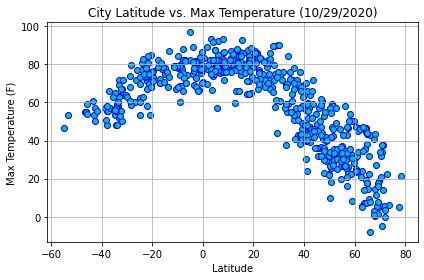

In [12]:
# Plot scatter for City Latitude vs. Max Temperature
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude vs. Max Temperature ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_max_temp"
)


In [13]:
# The intent of the above scatter is to evaluate temperature change over the city latitude change.  
# Here one could say the temperatures in further north (60 thru 80) and south (-40 thru -60) city 
#latitudes are cooler than at the equator (0)

## Latitude vs. Humidity Plot

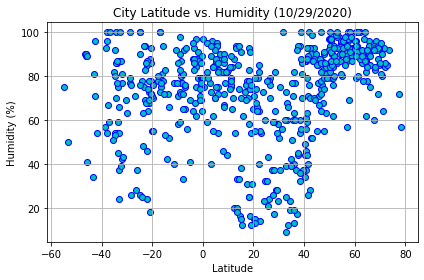

In [14]:
# Plot scatter for City Latitude vs. Humidity
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude vs. Humidity ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_humidity"
)

In [15]:
# Here we trying to see if city latitude has any relationship with humidity, but this plot is a bit all over the place.
# However there is high concentration of humidity in the northern city latitudes from 45 degress to 85 degrees which
# could indicate some tendency of higher humidity in those locations

## Latitude vs. Cloudiness Plot

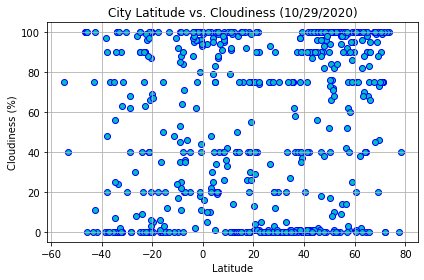

In [16]:
# Plot scatter for City Latitude vs. Cloudiness
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude vs. Cloudiness ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_cloudiness"
)

In [17]:
# Here we are plotting Clouds presence vs latitude, meaning is it more cloudy in some citys vs others 
# lattitude wise. I do see some layering here but is spans the entire lattitude plot so I cannot draw 
# any conclusions.

## Latitude vs. Wind Speed Plot

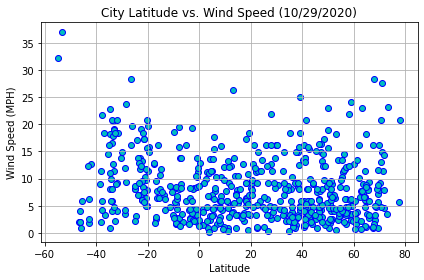

In [18]:
# Plot scatter for City Latitude vs. Wind Speed
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude vs. Wind Speed ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_wind_speed"
)

In [19]:
# This plot looks at how high the winds are in miles per hour with respect to city latitudes.  
# Again here things look to be evenly distributed and for the most part the majority of 
# locations have winds from 0-10 mph.
#

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# set up the northern hemisphere data frame to be used for all northern hemisphere plots
northern_hemisphere = clean_city_data[clean_city_data["Lat"] >= 0]

The r-value is: -0.8759654911966914


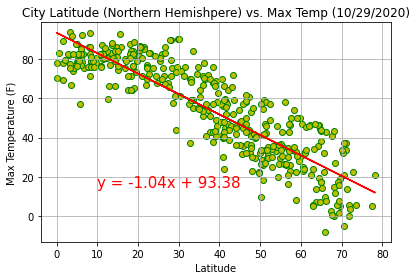

In [21]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Max Temp w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Northern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_max_temp",
    True,
    (10,15)
)

In [22]:
# This plot shows maximum temperatures vs northern city latitudes, we can certainly see a strong relationship
# by the regresssion that starting from the equator to the north most latitudes the temperature drops!
#

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
# set up the southern hemisphere data frame to be used for all southern hemisphere plots
southern_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]

The r-value is: 0.7567564596258539


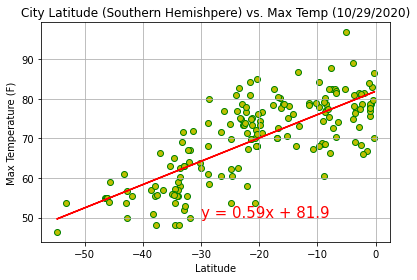

In [24]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Max Temp w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Southern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_max_temp",
    True,
    (-30,50)
)

In [25]:
# This plot shows maximum temperatures vs southern city latitudes, we see the same pattern as the northern
# hemisphere only in reverse, starting at the equator moving south the temperature drops.
#

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3471274126650971


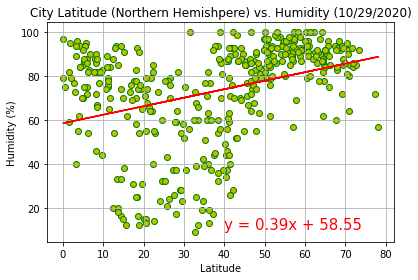

In [26]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Humidity w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Northern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_humidity",
    True,
    (40,10)
)

In [27]:
# This plot shows humidity vs northern city latitudes, what I see here is a slight tendency through 
# regression towards higher humidity the further north you go, but not strong enough of a relationship
# to say it is correlated
#

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11945265710093617


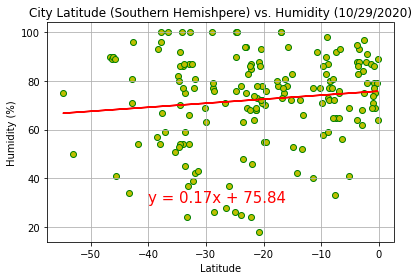

In [28]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Humidity w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Southern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_humidity",
    True,
    (-40,30)
)

In [29]:
# This plot shows humidity vs southern city latitudes, what I see here is a slight tendency through 
# regression towards lower humidity the further south you go, but not strong enough of a relationship
# to say it is correlated
#

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21394639950867336


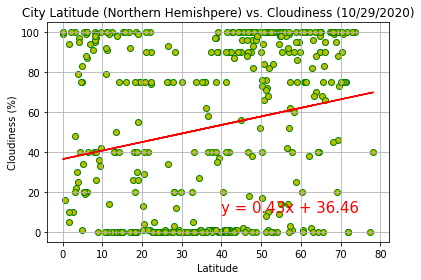

In [30]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Cloudiness w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Northern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_cloudiness",
    True,
    (40,10)
)

In [31]:
# This plot shows cloudiness vs northern city latitudes, what I see here is a slight tendency through 
# regression towards higher cloudiness the further north you go, but not strong enough of a relationship
# to say it is correlated
#

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15291155507010343


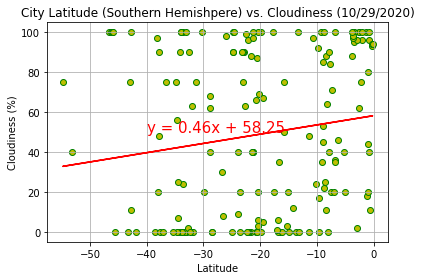

In [32]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Cloudiness w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Southern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_cloudiness",
    True,
    (-40,50)
)

In [33]:
# This plot shows cloudiness vs southern city latitudes, what I see here is a slight tendency through 
# regression towards lower cloudiness the further south you go, but not strong enough of a relationship
# to say it is correlated
#

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08096828941976975


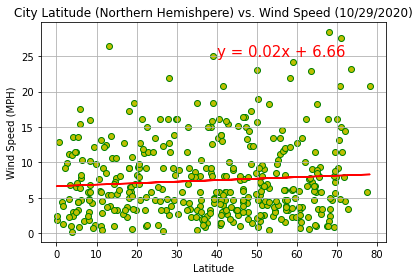

In [34]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Wind Speed w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Northern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_wind_speed",
    True,
    (40,25)
)

In [35]:
# This plot shows wind speed vs northern city latitudes, what I see here is a slight tendency through 
# regression towards higher windiness the further north you go, but not strong enough of a relationship
# to say it is correlated
# However that said there is a pretty high concentration of citys with winds 0-10 mph across the board.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2845890206773257


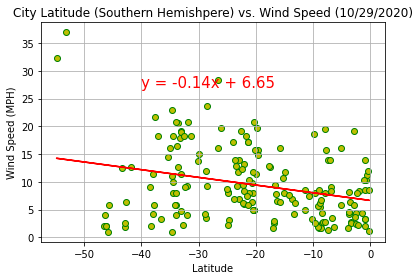

In [36]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Wind Speed w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Southern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_wind_speed",
    True,
    (-40,27)
)

In [37]:
# This plot shows wind speed vs southern city latitudes, what I see here is a slight tendency through 
# regression towards higher wind speed the further south you go, but not strong enough of a relationship
# to say it is correlated
# 